Loan Prediction 


In [37]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
data = pd.read_csv("loan_prediction_data.csv")

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [40]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [41]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [45]:
data= data.drop("Loan_ID",axis= 1)

In [46]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [47]:
X = data.drop("Loan_Status",axis= 1)
y = data['Loan_Status']

In [48]:
X.shape ,y.shape


((614, 11), (614,))

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['Loan_Status'],test_size = 0.2, random_state = 10)

In [50]:
X_train.shape,X_test.shape ,y_train.shape ,y_test.shape

((491, 11), (123, 11), (491,), (123,))

ARCHITECTURE OF NEURAL NETWORK

In [51]:
import keras as ks
from keras import Sequential
from keras.layers import InputLayer ,Dense


In [52]:
X_train.shape

(491, 11)

In [53]:
X_train.shape[1]

11

In [54]:
input_neurons = X_train.shape[1]

In [55]:
no_of_hidden_layers = 2
neuron_hidden_layer1 = 5
neuron_hidden_layer2  = 10
output_neurons = 1

In [56]:
model = Sequential()
model.add(InputLayer(input_shape= (input_neurons,)))
model.add(Dense(units= neuron_hidden_layer1,activation= 'relu'))
model.add(Dense(units= neuron_hidden_layer2,activation= 'relu'))
model.add(Dense(units= output_neurons ,activation= 'sigmoid'))

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [58]:
input_neurons * neuron_hidden_layer1

55

In [59]:
input_neurons * neuron_hidden_layer2+10

120

In [60]:
neuron_hidden_layer1 * neuron_hidden_layer2 +5

55

In [61]:
model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics=['accuracy'] )

Trainning the model 

In [62]:
model_history = model.fit(X_train,y_train ,validation_data= (X_test,y_test),epochs = 50)

Train on 491 samples, validate on 123 samples
Epoch 1/50
491/491 [==============================] - 2s 4ms/step - loss: 0.6379 - accuracy: 0.6864 - val_loss: 0.6348 - val_accuracy: 0.6911
Epoch 2/50
491/491 [==============================] - 0s 166us/step - loss: 0.6201 - accuracy: 0.6864 - val_loss: 0.6206 - val_accuracy: 0.6911
Epoch 3/50
491/491 [==============================] - 0s 141us/step - loss: 0.6067 - accuracy: 0.6864 - val_loss: 0.6105 - val_accuracy: 0.6911
Epoch 4/50
491/491 [==============================] - 0s 154us/step - loss: 0.5977 - accuracy: 0.6864 - val_loss: 0.6030 - val_accuracy: 0.6911
Epoch 5/50
491/491 [==============================] - 0s 153us/step - loss: 0.5904 - accuracy: 0.6864 - val_loss: 0.5965 - val_accuracy: 0.6911
Epoch 6/50
491/491 [==============================] - 0s 147us/step - loss: 0.5832 - accuracy: 0.6864 - val_loss: 0.5900 - val_accuracy: 0.6911
Epoch 7/50
491/491 [==============================] - 0s 150us/step - loss: 0.5758 - accurac

Evaluating model in validation set

In [63]:
prediction  = model.predict_classes(X_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8048780487804879

Visualizing  the model performance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


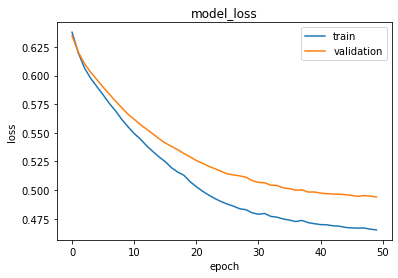

In [76]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' ,'validation'], loc = 'upper_left')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


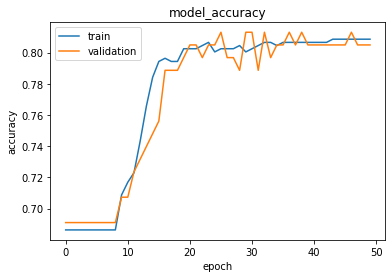

In [78]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' ,'validation'], loc = 'upper_left')
plt.show()